In [1]:
import os
import sys
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import magcolloids as mgc

sys.path.insert(0, '../icenumerics')

import icenumerics as ice

# Vertex Count

    In this script, I will analyze the vertex count in a Cairo Lattice if we increse linearly up from 0 mT to 25 mT with a rate of 0.0125 mT/s (2000 s) and then mantaining the magnetic field constant (25 mT). Then, we are analyzing the output data of Script-8.1.
    


In [2]:
rate = 25/2000

In [3]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-8.2"

In [4]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'ACI_CairoLattice_25mT-2500s_FreeBound_l10_exp*.dat'):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

ACI_CairoLattice_25mT-2500s_FreeBound_l10_exp7.dat
ACI_CairoLattice_25mT-2500s_FreeBound_l10_exp4.dat
ACI_CairoLattice_25mT-2500s_FreeBound_l10_exp2.dat
ACI_CairoLattice_25mT-2500s_FreeBound_l10_exp0.dat
ACI_CairoLattice_25mT-2500s_FreeBound_l10_exp9.dat
ACI_CairoLattice_25mT-2500s_FreeBound_l10_exp6.dat
ACI_CairoLattice_25mT-2500s_FreeBound_l10_exp8.dat
ACI_CairoLattice_25mT-2500s_FreeBound_l10_exp3.dat
ACI_CairoLattice_25mT-2500s_FreeBound_l10_exp5.dat
ACI_CairoLattice_25mT-2500s_FreeBound_l10_exp1.dat


In [5]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)

In [6]:
Cairo_exp.index.names = ['Exp', 'frame', 'id']

In [7]:
Cairo_exp

x           y  coordination  charge        dx  \
Exp frame  id                                                             
0   0      0       0.000000   -9.772898             3      -1 -1.732051   
           1       0.000000    9.772898             3      -1  0.000000   
           2       0.000000 -473.292807             3       1  0.000000   
           3      23.174375 -486.690558             4       0  0.000000   
           4       0.000000 -453.747202             3       3  0.000000   
...                     ...         ...           ...     ...       ...   
9   250000 1232   92.704002 -639.155048             3      -1 -1.732051   
           1233  658.700809 -602.575989             3       1  1.000000   
           1234  639.155115 -602.575989             3      -1  1.000000   
           1235  639.155315 -509.872009             3      -1 -2.000000   
           1236  658.700703 -509.872009             3      -1 -1.000000   

                           dy  
Exp frame  id                  
0   0      0     1.000000e+00  
           1     2.000000e+00  
           2     2.000000e+00  
           3     0.000000e+00  
           4    -3.747952e-07  
...                       ...  
9   250000 1232 -1.000000e+00  
           1233  1.732051e+00  
           1234 -1.732051e+00  
           1235  0.000000e+00  
           1236 -1.732051e+00  

[3104870 rows x 6 columns]

### Filter the vertices at the boundaries 

In [8]:
First_frame = Cairo_exp.loc[0,0]

In [9]:
x_min = 100
y_min = -100

width = 700
hight = -700

x_max = x_min+width
y_max = y_min+hight

print(x_min,x_max,y_min,y_max)

100 800 -100 -800


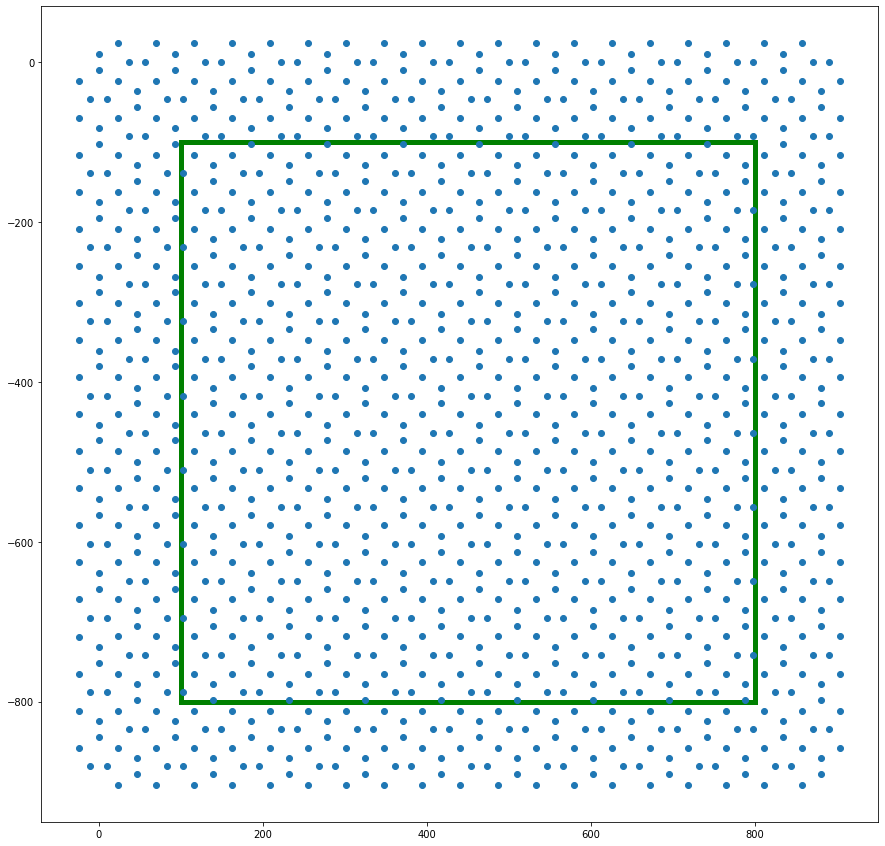

In [10]:
from matplotlib.patches import Rectangle
fig =plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)

plt.plot(First_frame.x, First_frame.y , 'o')
ax.add_patch(Rectangle((x_min, y_min),width, hight,fc ='none', ec ='g',lw = 5))

In [11]:
Ca = Cairo_exp.loc[(Cairo_exp['x']<x_max) & (Cairo_exp['x']>x_min)]
Cairo_exp = Ca.loc[(Ca['y']>y_max) & (Ca['y']<y_min)]

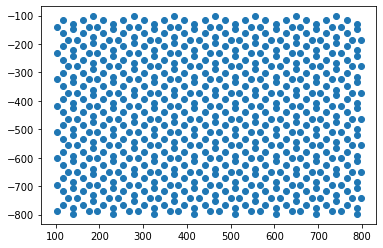

In [12]:
plt.plot(Cairo_exp.loc[0,0].x,Cairo_exp.loc[0,0].y,'o')

### Classify vertices

In [13]:
Cairo_exp["type"] = np.NaN

# 4-fold vertices classification

Cairo_exp.loc[Cairo_exp.charge==-4, "type"] = "Q = -4"
Cairo_exp.loc[Cairo_exp.charge==-2, "type"] = "Q = -2"
Cairo_exp.loc[Cairo_exp.charge==+2, "type"] = "Q = +2"
Cairo_exp.loc[Cairo_exp.charge==+4, "type"] = "Q = +4"

zeroq = Cairo_exp.charge==0

dipole_magnitude = np.sqrt(Cairo_exp[zeroq].dx**2+Cairo_exp[zeroq].dy**2)

Cairo_exp.loc[zeroq & (dipole_magnitude<1), "type"] = "Q = 0"
Cairo_exp.loc[zeroq & (dipole_magnitude>2) , "type"] = "Q = 0"

# 3-fold vertices classification

Cairo_exp.loc[Cairo_exp.charge==+1, "type"] = "Q = +1"
Cairo_exp.loc[Cairo_exp.charge==-1, "type"] = "Q = -1"
Cairo_exp.loc[Cairo_exp.charge==+3, "type"] = "Q = +3"
Cairo_exp.loc[Cairo_exp.charge==-3, "type"] = "Q = -3"

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
Cairo_exp = Cairo_exp.query('coordination == 4 or coordination == 3')

In [15]:
Cairo_exp

x           y  coordination  charge            dx  \
Exp frame  id                                                                 
0   0      7     208.589718 -347.636407             4      -2 -1.732051e+00   
           19    221.987203 -370.816010             3       3  3.747952e-07   
           20    370.816010 -380.588704             3      -1 -1.732051e+00   
           21    301.286650 -347.644988             4       2 -1.000000e+00   
           22    314.691198 -370.816010             3      -1 -2.000000e+00   
...                     ...         ...           ...     ...           ...   
9   250000 1230  685.507117 -556.223999             3       1 -1.000000e+00   
           1233  658.700809 -602.575989             3       1  1.000000e+00   
           1234  639.155115 -602.575989             3      -1  1.000000e+00   
           1235  639.155315 -509.872009             3      -1 -2.000000e+00   
           1236  658.700703 -509.872009             3      -1 -1.000000e+00   

                       dy    type  
Exp frame  id                      
0   0      7    -1.000000  Q = -2  
           19    0.000000  Q = +3  
           20    1.000000  Q = -1  
           21    1.732051  Q = +2  
           22    0.000000  Q = -1  
...                   ...     ...  
9   250000 1230  1.732051  Q = +1  
           1233  1.732051  Q = +1  
           1234 -1.732051  Q = -1  
           1235  0.000000  Q = -1  
           1236 -1.732051  Q = -1  

[1731900 rows x 7 columns]

### Route 1: From here I will try another method to count the vertices.

In [16]:
def count_vertices(vrt, exp = 'Exp', column = "type", column1 = "coordination", time = "frame"):
    vrt_count = vrt.groupby([exp,time,column,column1]).count().iloc[:,0].to_frame("number")

    vrt_count = vrt_count.reindex(pd.MultiIndex.from_product(
        [vrt_count.index.get_level_values(exp).unique(),
        vrt_count.index.get_level_values(time).unique(),
        vrt_count.index.get_level_values(column).unique(),
        vrt_count.index.get_level_values(column1).unique()]), fill_value = 0)

    total_vrt = vrt_count.groupby([exp,time,column1]).sum()
    array_coord = total_vrt.loc[vrt_count.index.get_level_values('frame')].number.values
    array_coordT = np.tile(array_coord,9*10)# 9 times of charges and 10 experiments 
    vrt_count["fraction"] = vrt_count.number / array_coordT
        
    return vrt_count

In [17]:
count_m = count_vertices(Cairo_exp)

    the err of the fraction is missing...

In [18]:
v_counts_m = count_m.groupby(["frame","type","coordination"]).mean()
v_counts_m["err"] = count_m['fraction'].groupby(["frame","type","coordination"]).std()/np.sqrt(count_m['fraction'].groupby(["frame","type","coordination"]).count().values)

    I have to drop the rows without fraction of charge. 

In [19]:
v_counts_m

number  fraction       err
frame  type   coordination                            
0      Q = +1 3              174.5  0.375269  0.008306
              4                0.0  0.000000  0.000000
       Q = +2 3                0.0  0.000000  0.000000
              4               55.0  0.244444  0.013610
       Q = +3 3               58.3  0.125376  0.004420
...                            ...       ...       ...
250000 Q = -3 4                0.0  0.000000  0.000000
       Q = -4 3                0.0  0.000000  0.000000
              4                0.0  0.000000  0.000000
       Q = 0  3                0.0  0.000000  0.000000
              4              191.4  0.850667  0.007873

[4518 rows x 3 columns]

    Dropping rows with zero values:

In [20]:
v_counts_m = v_counts_m[(v_counts_m != 0).all(1)]

In [21]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red","black"])

In [22]:
v_counts_m['time'] = v_counts_m.index.get_level_values('frame')/100

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


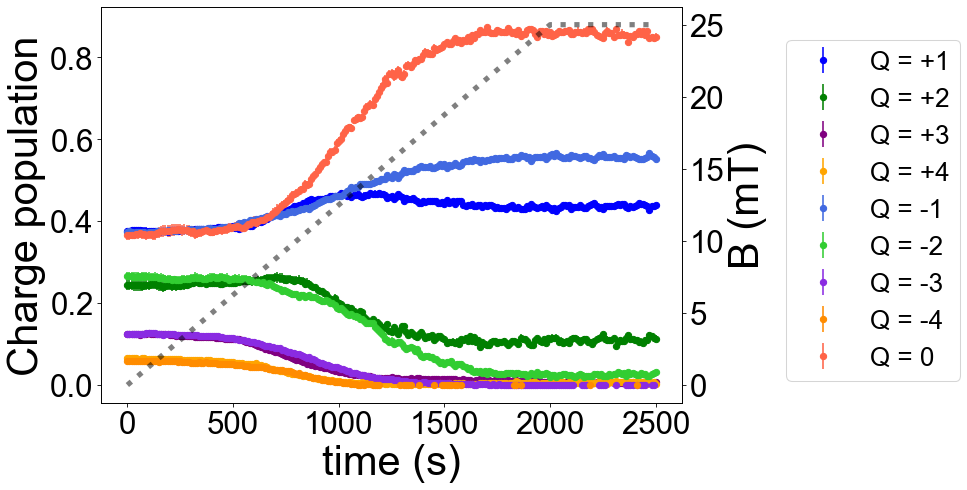

In [23]:
fig, ax1 = plt.subplots(figsize=(10,7))

ax2 = ax1.twinx()



for typ_m, mtype in v_counts_m.groupby('type'):
    
    ax1.errorbar(mtype['time'], mtype["fraction"],yerr = mtype["err"], fmt ='o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 25, bbox_to_anchor=(1.5, 0.95))
ax1.set_xlabel('time (s)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

ax2.plot([0,2000,2500],[0,25,25],':', color = 'black', alpha = 0.5, lw = 5)


ax2.set_ylabel('B (mT)', size = 40)
ax2.tick_params(axis='y', labelsize=30)

v_counts_m.to_csv('FreeBound.dat', sep = "\t")

plt.show()

In [24]:
v_counts_m.to_csv('Cairo_simulation_data-N=50.dat', sep = '\t')

### Route 2: Old method to count the vertices.

In [25]:
def count_types(data):
    
    data["mean"] = 0
    cats = ["Q = -4", "Q = -2", "Q = 0", "Q = +2", "Q = +4","Q = +1","Q = -1","Q = +3","Q = -3" ]
    zeros = pd.DataFrame(np.zeros(len(cats)), columns=["mean"], index = cats)
    zeros.index.name="type"
    counts = zeros+data.groupby("type").count()
    counts[counts.isna()]=0
    return counts

Cairo_exp["mean"]= 0

In [26]:
Cairo_exp['field'] = Cairo_exp.index.get_level_values('frame')
Cairo_exp

x           y  coordination  charge            dx  \
Exp frame  id                                                                 
0   0      7     208.589718 -347.636407             4      -2 -1.732051e+00   
           19    221.987203 -370.816010             3       3  3.747952e-07   
           20    370.816010 -380.588704             3      -1 -1.732051e+00   
           21    301.286650 -347.644988             4       2 -1.000000e+00   
           22    314.691198 -370.816010             3      -1 -2.000000e+00   
...                     ...         ...           ...     ...           ...   
9   250000 1230  685.507117 -556.223999             3       1 -1.000000e+00   
           1233  658.700809 -602.575989             3       1  1.000000e+00   
           1234  639.155115 -602.575989             3      -1  1.000000e+00   
           1235  639.155315 -509.872009             3      -1 -2.000000e+00   
           1236  658.700703 -509.872009             3      -1 -1.000000e+00   

                       dy    type  mean   field  
Exp frame  id                                    
0   0      7    -1.000000  Q = -2     0       0  
           19    0.000000  Q = +3     0       0  
           20    1.000000  Q = -1     0       0  
           21    1.732051  Q = +2     0       0  
           22    0.000000  Q = -1     0       0  
...                   ...     ...   ...     ...  
9   250000 1230  1.732051  Q = +1     0  250000  
           1233  1.732051  Q = +1     0  250000  
           1234 -1.732051  Q = -1     0  250000  
           1235  0.000000  Q = -1     0  250000  
           1236 -1.732051  Q = -1     0  250000  

[1731900 rows x 9 columns]

In [27]:
count_m = Cairo_exp.loc[:,["type","field","coordination"]].groupby(["Exp","field","coordination"]).apply(count_types)
count_m

coordination  field   mean
Exp field  coordination type                              
0   0      3            Q = +1           0.0    0.0  174.0
                        Q = +2           0.0    0.0    0.0
                        Q = +3           0.0    0.0   53.0
                        Q = +4           0.0    0.0    0.0
                        Q = -1           0.0    0.0  171.0
...                                      ...    ...    ...
9   250000 4            Q = -1           0.0    0.0    0.0
                        Q = -2           0.0    0.0   10.0
                        Q = -3           0.0    0.0    0.0
                        Q = -4           0.0    0.0    0.0
                        Q = 0            0.0    0.0  184.0

[45180 rows x 3 columns]

In [28]:
increase = (count_m/Cairo_exp.groupby(["Exp","field","coordination"]).count()).filter(["mean"])

In [29]:
a = increase.query('mean != 0')
a = a.reset_index()
del a['coordination']
a = a.set_index(['Exp', 'field','type'])
a

mean
Exp field  type            
0   0      Q = +1  0.374194
           Q = +3  0.113978
           Q = -1  0.367742
           Q = -3  0.144086
           Q = +2  0.213333
...                     ...
9   250000 Q = +3  0.015054
           Q = -1  0.563441
           Q = +2  0.137778
           Q = -2  0.044444
           Q = 0   0.817778

[19826 rows x 1 columns]

In [30]:
v_counts_m = a.groupby(["field","type"]).mean()
v_counts_m["err"] = a.groupby(
    ["field","type"]).std()/np.sqrt(a.groupby(["field","type"]).count().values)

In [31]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red","black"])

In [32]:
v_counts_m['time'] = v_counts_m.index.get_level_values('field')/100

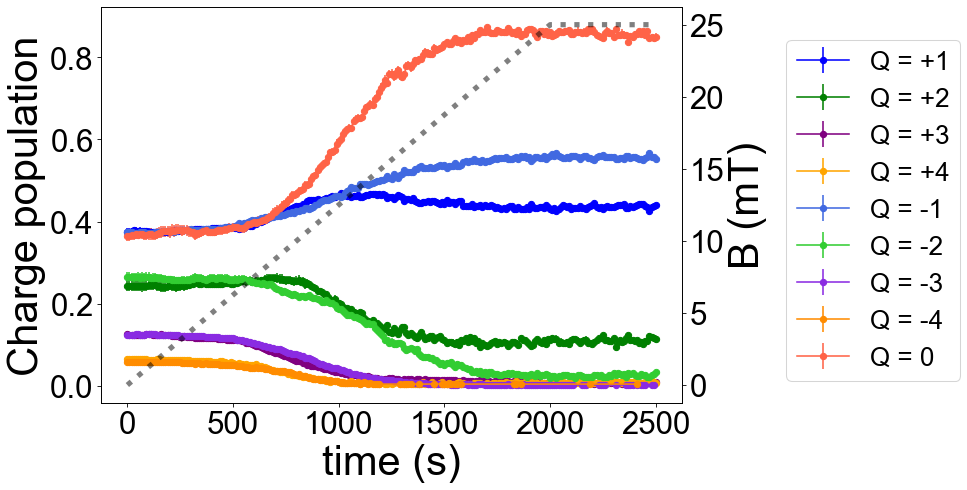

In [33]:
fig, ax1 = plt.subplots(figsize=(10,7))

ax2 = ax1.twinx()



for typ_m, mtype in v_counts_m.groupby('type'):
    
    ax1.errorbar(mtype['time'], mtype["mean"],yerr = mtype["err"], fmt ='-o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 25, bbox_to_anchor=(1.5, 0.95))
ax1.set_xlabel('time (s)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

ax2.plot([0,2000,2500],[0,25,25],':', color = 'black', alpha = 0.5, lw = 5)


ax2.set_ylabel('B (mT)', size = 40)
ax2.tick_params(axis='y', labelsize=30)

#v_counts_m.to_csv('PeriodicBound.dat', sep = "\t")

plt.show()

In [34]:
a = 472
b = 344

In [35]:
a/b

1.372093023255814